06720.jpg	


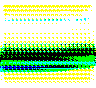

01410.jpg	


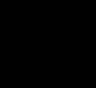

05040.jpg	


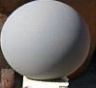

06310.jpg	


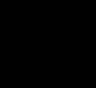

07370.jpg	


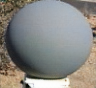

16200.jpg	


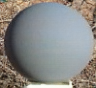

02920.jpg	


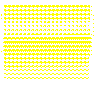

11550.jpg	


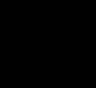

05760.jpg	


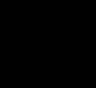

09780.jpg	


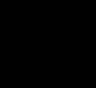

In [8]:
require 'torch'
require 'nn'
require 'image'
utils = require 'utils'
require 'nngraph'
require 'ShaveImage'

local cmd = torch.CmdLine()

-- Model options
cmd:option('-model', 'checkpoint.t7')

-- Input / output options
cmd:option('-input_dir', 'Grayball11346_clip_resize/ApacheTrail')
cmd:option('-output_dir', 'Grayball11346_clip_resize_proceed/ApacheTrail')

-- GPU options
cmd:option('-gpu', 0)
cmd:option('-backend', 'cuda')
cmd:option('-use_cudnn', 1)
cmd:option('-cudnn_benchmark', 0)

opt = cmd:parse(arg or {})

dtype, use_cudnn = utils.setup_gpu(opt.gpu, opt.backend, opt.use_cudnn == 1)
ok, checkpoint = pcall(function() return torch.load(opt.model) end)
dtype = 'torch.FloatTensor'
if not ok then
    print('ERROR: Could not load model from ' .. opt.model)
end

model = checkpoint.model
model:evaluate()
model:type(dtype)


-- get file list
function gen_file_list(dir)
    local files = {}

    for file in paths.files(dir) do
        if file:find('[.]jpg$') then
            table.insert(files, file)
        end
    end

    return files
end

function process_file(iFile, oFile)
    local img = image.load(iFile):type('torch.FloatTensor')
    local img_pro = torch.Tensor(img:size())
    
    local iSize = img_pro:size()
    local input = img_pro:view(1, iSize[1], iSize[2], iSize[3])
    
    local res = model:forward(input:type(dtype))
    
    itorch.image(res[1])
    image.save(oFile, res[1])
end -- function process_file



for i, file in ipairs(gen_file_list(opt.input_dir)) do
    if i > 10 then
        return
    end
    print(file)
    process_file(
        paths.concat(opt.input_dir, file),
        paths.concat(opt.output_dir, file))
end